# Applied Regression 

In this lecture we will be using the heart failure dataset given here,
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records.

This dataset captures a bunch of information about patients that expereienced heart failure. 


Here we have the data codebook, which lists out the variables and their interpretation.



Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

    Let's begin by reading in the dataset.
    

In [2]:
heart <- read.csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv")

### Checkpoint: How many columns does the dataset have?

Let's plot some of the dataset variables.

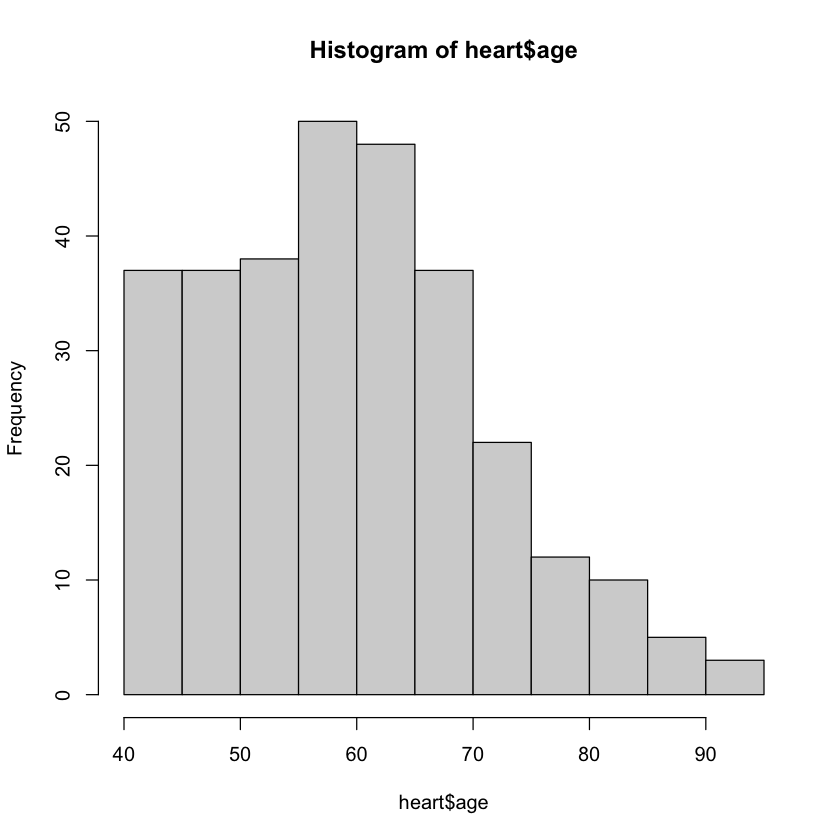

In [8]:
hist(heart$age)

### Checkpoint: What does the age distribution look like?


We will now investigate whether age is correlated with smoking status which is a binary variable. In order to do this we,

* Plot the variables of interest (age, smoking)
* Compute the mean age of smokers and the mean age of non-smokers.
* Plot the histograms of the difference in age between smokers and non-smokers.
* Identify whether it overlaps with zero. 
* Confirm your results with a linear model call (lm)

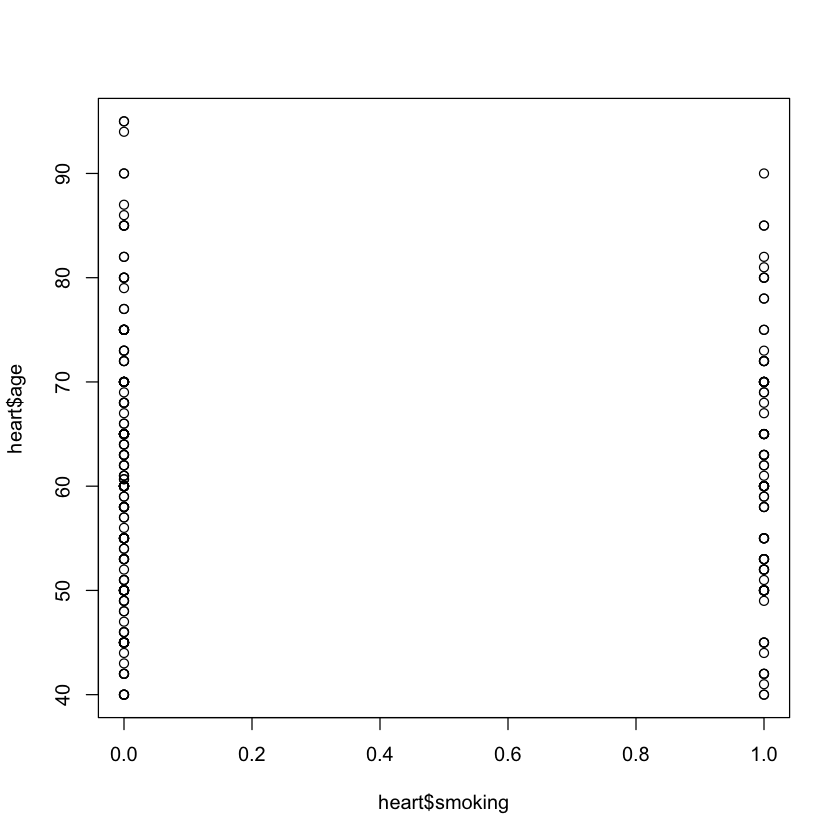

In [14]:
plot(heart$smoking,heart$age)
age_of_smokers <- heart[heart$smoking == 1 ,]$age
age_of_non_smokers <- heart[heart$smoking == 0 ,]$age

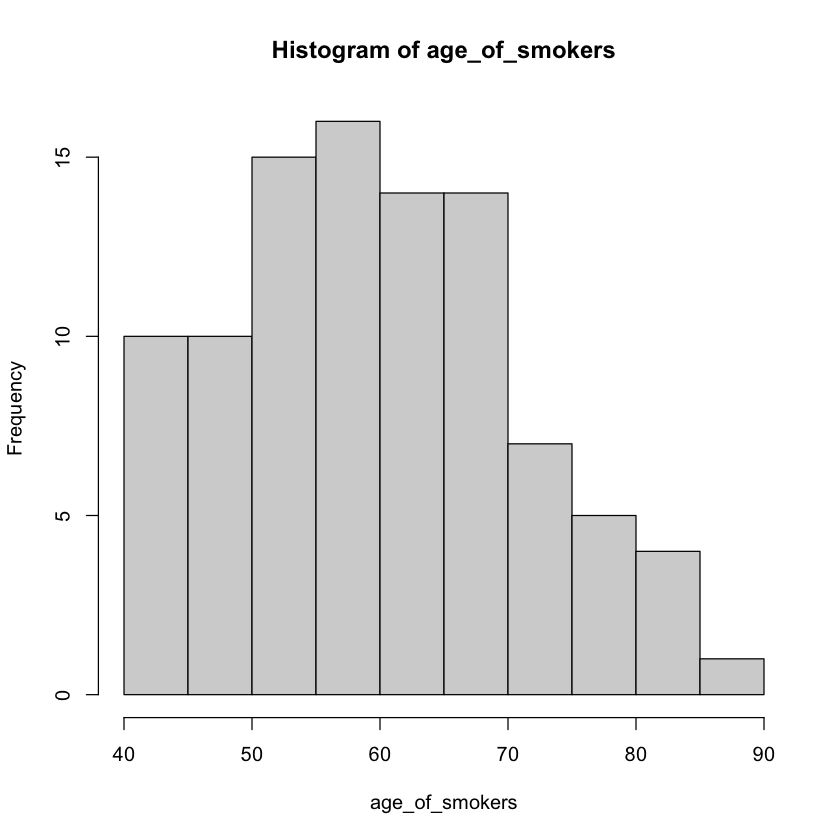

In [15]:
hist(age_of_smokers)

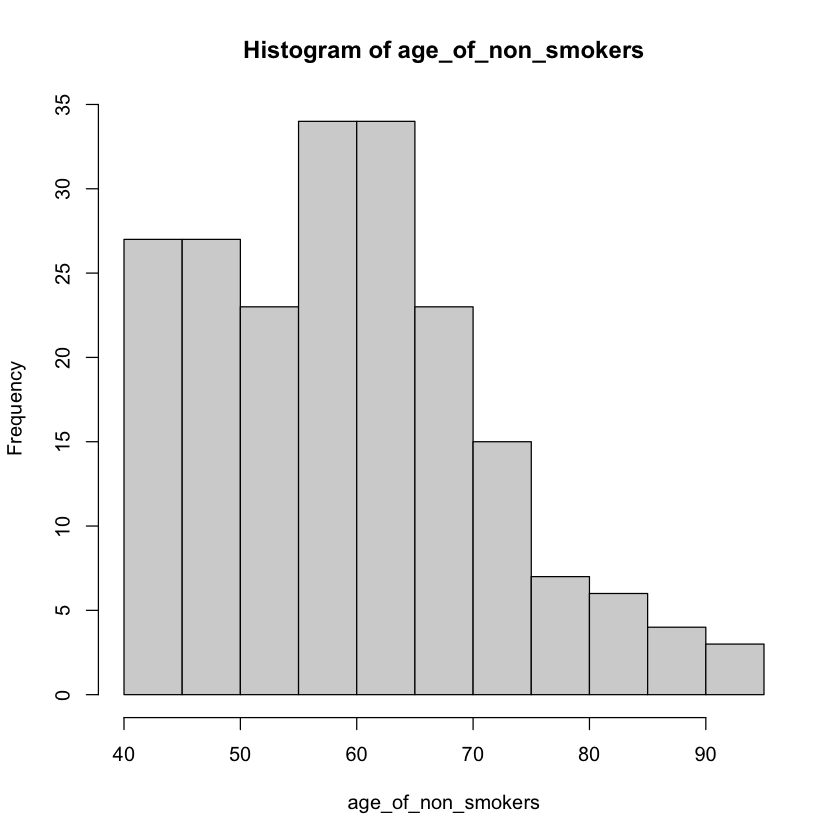

In [16]:
hist(age_of_non_smokers)

In [17]:
mean(age_of_smokers) - mean(age_of_non_smokers)

[1] 0.4748017

Warning message in age_of_smokers - age_of_non_smokers:
“longer object length is not a multiple of shorter object length”


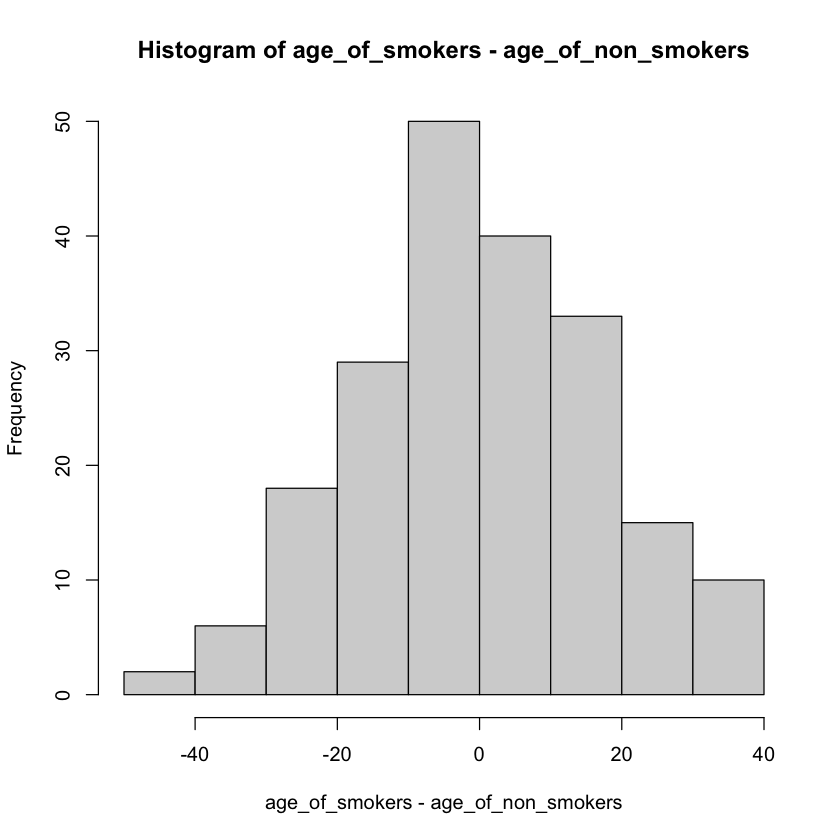

In [18]:
hist(age_of_smokers - age_of_non_smokers)

In [4]:
summary(lm(age ~ smoking,data=heart))


Call:
lm(formula = age ~ smoking, data = heart)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.156  -9.919  -0.681   8.844  34.319 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  60.6814     0.8361  72.576   <2e-16 ***
smoking       0.4748     1.4756   0.322    0.748    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.91 on 297 degrees of freedom
Multiple R-squared:  0.0003485,	Adjusted R-squared:  -0.003017 
F-statistic: 0.1035 on 1 and 297 DF,  p-value: 0.7479


We will now investigate whether age is correlated with CPK which is a continous variable. In order to do this we,

* Plot the variables of interest (age, smoking)
* Investigate coefficients with a linear model call (lm)

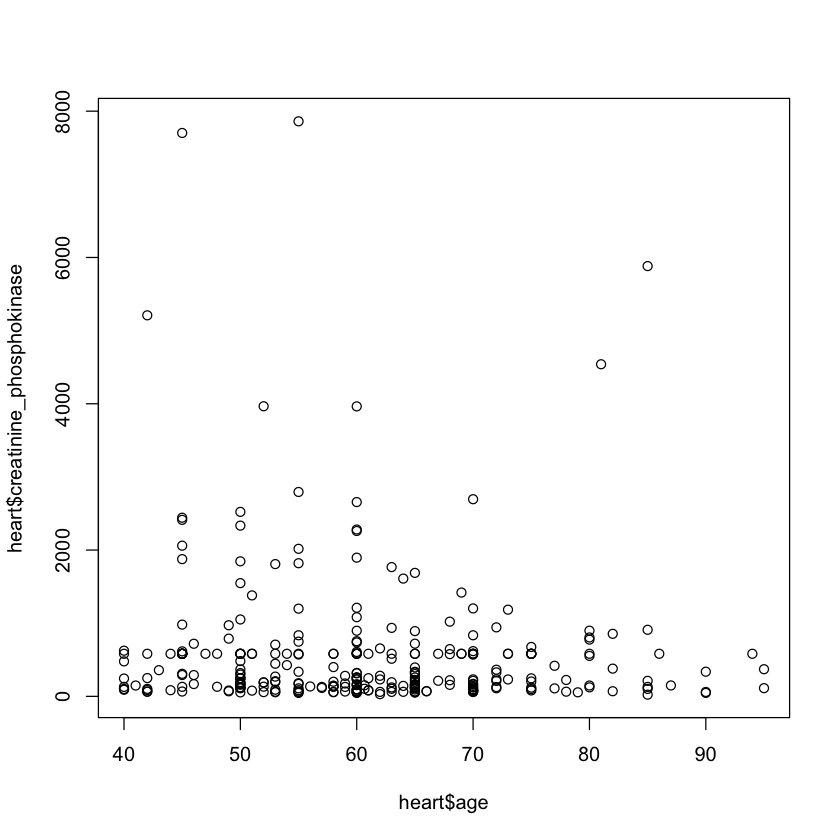

In [9]:
plot(heart$age,heart$creatinine_phosphokinase)

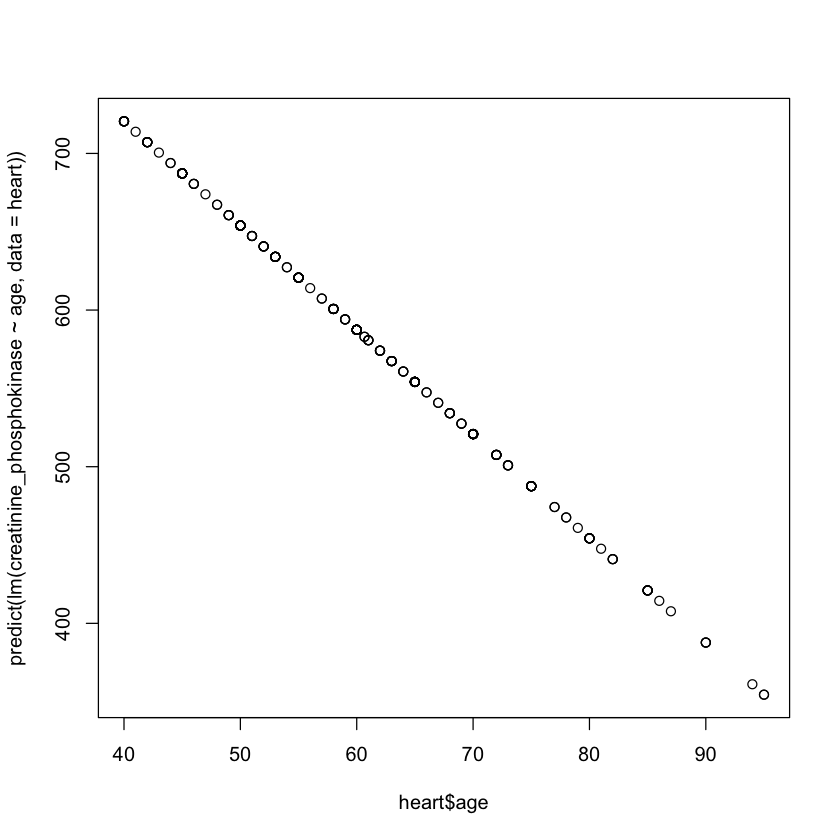

In [14]:
plot(heart$age,predict(lm(creatinine_phosphokinase ~ age ,data=heart)))

In [15]:
summary(lm(creatinine_phosphokinase ~ age ,data=heart) )


Call:
lm(formula = creatinine_phosphokinase ~ age, data = heart)

Residuals:
   Min     1Q Median     3Q    Max 
-643.2 -453.3 -308.8   52.3 7240.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  986.689    292.402   3.374 0.000838 ***
age           -6.655      4.718  -1.411 0.159381    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 968.7 on 297 degrees of freedom
Multiple R-squared:  0.006656,	Adjusted R-squared:  0.003311 
F-statistic:  1.99 on 1 and 297 DF,  p-value: 0.1594


### Checkpoint: Is high blood pressure associated with higher rate of heart attacks?
